# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikaze
Processing Record 2 of Set 1 | yulinshi
Processing Record 3 of Set 1 | haiku-pauwela
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | rabigh
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | al majaridah
Processing Record 9 of Set 1 | great falls
Processing Record 10 of Set 1 | jayapura
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | utrik
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | de aar
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | praia da vitoria
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | mejit
Processing Record 20 of Set 1 | isafjordur
Processing Record 21 of Set 1 | inekar
City not found. Skipping...
Processing Record 22 of Set 

Processing Record 39 of Set 4 | keshorai patan
Processing Record 40 of Set 4 | sibbo
Processing Record 41 of Set 4 | gadzhiyevo
Processing Record 42 of Set 4 | anadyr
Processing Record 43 of Set 4 | harstad
Processing Record 44 of Set 4 | polyarnyy
Processing Record 45 of Set 4 | labasa
Processing Record 46 of Set 4 | ust-nera
Processing Record 47 of Set 4 | geraldton
Processing Record 48 of Set 4 | taco pozo
Processing Record 49 of Set 4 | afaahiti
Processing Record 0 of Set 5 | coronel moldes
Processing Record 1 of Set 5 | siwa oasis
Processing Record 2 of Set 5 | jose mariano jimenez
City not found. Skipping...
Processing Record 3 of Set 5 | vilyuchinsk
Processing Record 4 of Set 5 | inarajan village
Processing Record 5 of Set 5 | kulia village
City not found. Skipping...
Processing Record 6 of Set 5 | rabo de peixe
Processing Record 7 of Set 5 | hawaiian paradise park
Processing Record 8 of Set 5 | dosso
Processing Record 9 of Set 5 | beyneu
Processing Record 10 of Set 5 | shimoda


Processing Record 32 of Set 8 | cuamba
Processing Record 33 of Set 8 | punta arenas
Processing Record 34 of Set 8 | shenjiamen
Processing Record 35 of Set 8 | kandahar
Processing Record 36 of Set 8 | kirakira
Processing Record 37 of Set 8 | buala
Processing Record 38 of Set 8 | mount pearl
Processing Record 39 of Set 8 | sovetskoye
Processing Record 40 of Set 8 | changli
Processing Record 41 of Set 8 | phalaborwa
Processing Record 42 of Set 8 | steamboat springs
Processing Record 43 of Set 8 | byron bay
Processing Record 44 of Set 8 | boujniba
Processing Record 45 of Set 8 | krasnovishersk
Processing Record 46 of Set 8 | berdyansk
Processing Record 47 of Set 8 | malabar
Processing Record 48 of Set 8 | taman rajawali
City not found. Skipping...
Processing Record 49 of Set 8 | odacho-oda
Processing Record 0 of Set 9 | tsiombe
Processing Record 1 of Set 9 | hamilton
Processing Record 2 of Set 9 | labytnangi
Processing Record 3 of Set 9 | antofagasta
Processing Record 4 of Set 9 | katoro
P

Processing Record 18 of Set 12 | mirnyy
Processing Record 19 of Set 12 | vikulovo
Processing Record 20 of Set 12 | gwanda
Processing Record 21 of Set 12 | leh
Processing Record 22 of Set 12 | bria
Processing Record 23 of Set 12 | kokopo
Processing Record 24 of Set 12 | fougamou
Processing Record 25 of Set 12 | embarcacion
Processing Record 26 of Set 12 | khaur
Processing Record 27 of Set 12 | kapit
Processing Record 28 of Set 12 | aldan
Processing Record 29 of Set 12 | pyay
Processing Record 30 of Set 12 | himatnagar
Processing Record 31 of Set 12 | pointe-noire
Processing Record 32 of Set 12 | peronne
Processing Record 33 of Set 12 | bada
Processing Record 34 of Set 12 | al bawiti
Processing Record 35 of Set 12 | san isidro de curuguaty
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikaze,29.2500,88.8833,11.14,45,17,1.95,CN,1717631422
1,yulinshi,38.2906,109.7494,18.80,56,100,5.34,CN,1717631422
2,haiku-pauwela,20.9219,-156.3051,28.45,73,40,9.26,US,1717631422
3,adamstown,-25.0660,-130.1015,22.18,75,6,4.44,PN,1717631423
4,rabigh,22.7986,39.0349,29.56,63,2,1.01,SA,1717631423


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikaze,29.2500,88.8833,11.14,45,17,1.95,CN,1717631422
1,yulinshi,38.2906,109.7494,18.80,56,100,5.34,CN,1717631422
2,haiku-pauwela,20.9219,-156.3051,28.45,73,40,9.26,US,1717631422
3,adamstown,-25.0660,-130.1015,22.18,75,6,4.44,PN,1717631423
4,rabigh,22.7986,39.0349,29.56,63,2,1.01,SA,1717631423


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

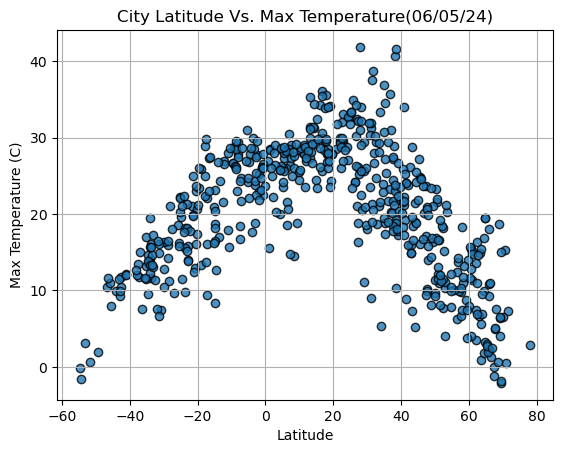

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/citylat_maxtemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

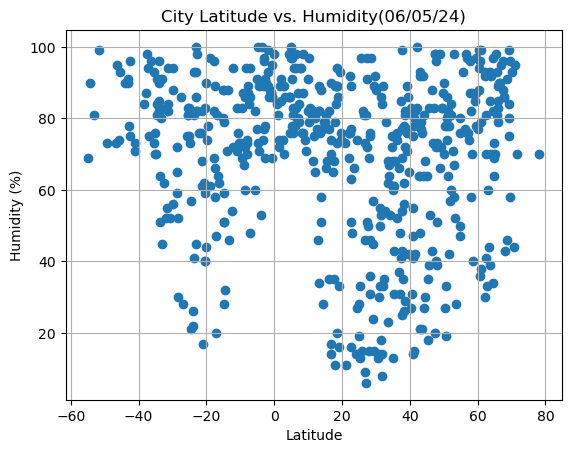

In [41]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/citylat_humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

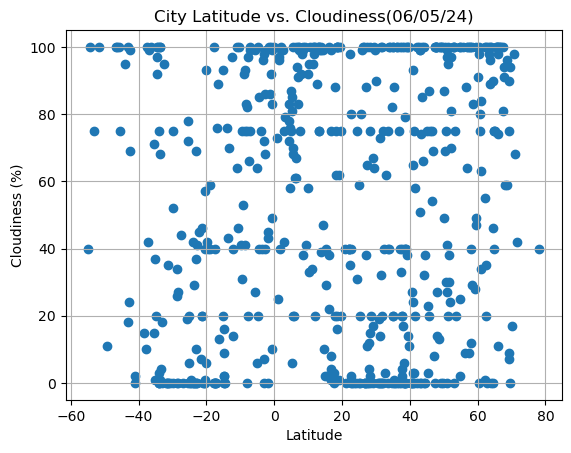

In [38]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/citylat_cloudi.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

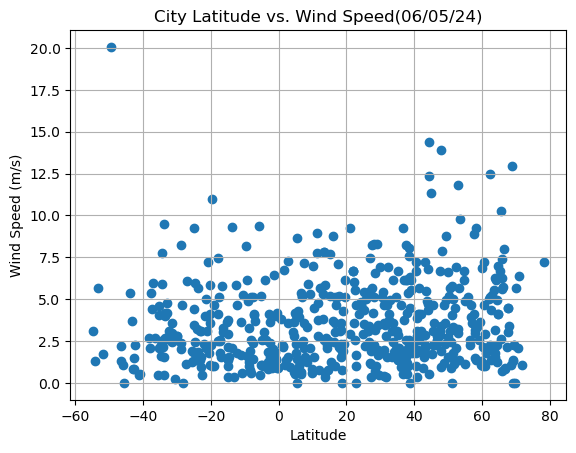

In [39]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Create the scatter plot
    plt.scatter(x_values, y_values, marker="o", label="Cities")
    
    # Plot the regression line
    regression_line = slope * x_values + intercept
    plt.plot(x_values, regression_line, color="red", line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2)))    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    print(f"The r-squared is: {rvalue}")
    
    # Save the figure
    plt.savefig(save_path)
    
    # Show plot
    plt.show()

In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikaze,29.2500,88.8833,11.14,45,17,1.95,CN,1717631422
1,yulinshi,38.2906,109.7494,18.80,56,100,5.34,CN,1717631422
2,haiku-pauwela,20.9219,-156.3051,28.45,73,40,9.26,US,1717631422
4,rabigh,22.7986,39.0349,29.56,63,2,1.01,SA,1717631423
5,albany,42.6001,-73.9662,26.21,64,100,0.89,US,1717631179


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,adamstown,-25.0660,-130.1015,22.18,75,6,4.44,PN,1717631423
6,puerto natales,-51.7236,-72.4875,0.65,99,100,1.70,CL,1717631178
9,jayapura,-2.5333,140.7000,27.66,90,99,1.86,ID,1717631423
10,puerto ayora,-0.7393,-90.3518,22.53,95,83,1.34,EC,1717631423
13,de aar,-30.6497,24.0123,7.37,52,0,0.26,ZA,1717631423


###  Temperature vs. Latitude Linear Regression Plot

AttributeError: Line2D.set() got an unexpected keyword argument 'line_eq'

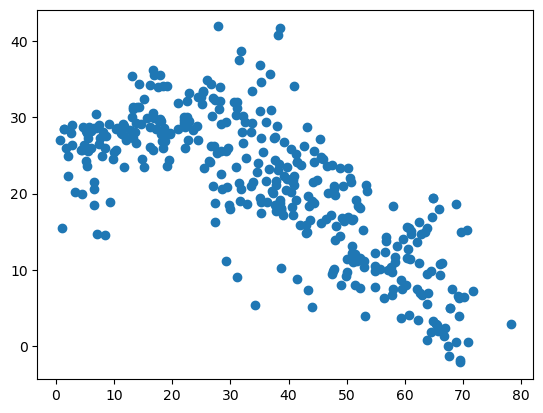

In [68]:
# Linear regression on Northern Hemisphere: Max Temperature vs. Latitude
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,  y_values, 
                       "Latitude", "Max Temp", 
                       "Northern Hemisphere: Latitude vs. Max Temperature", 
                       "output_data/NH_Lat_vs_MaxTemp.png")

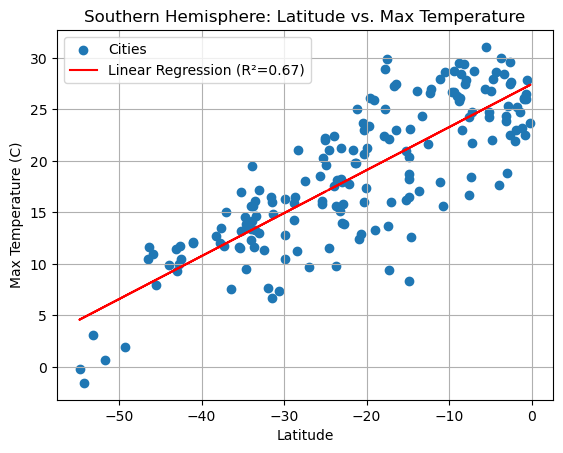

In [54]:
# Linear regression on Southern Hemisphere: Max Temperature vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Latitude", "Max Temperature (C)", 
                       "Southern Hemisphere: Latitude vs. Max Temperature", 
                       "output_data/SH_Lat_vs_MaxTemp.png")

**Discussion about the linear relationship:**

Both hemispheres decrease in temperature as distance increases from the equator. 

### Humidity vs. Latitude Linear Regression Plot

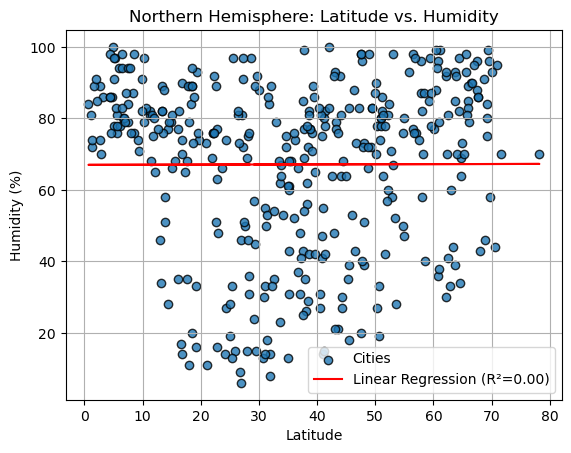

In [22]:
# Linear regression on Northern Hemisphere: Humidity vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Latitude", "Humidity (%)", 
                       "Northern Hemisphere: Latitude vs. Humidity", 
                       "output_data/NH_Lat_vs_Humidity.png")

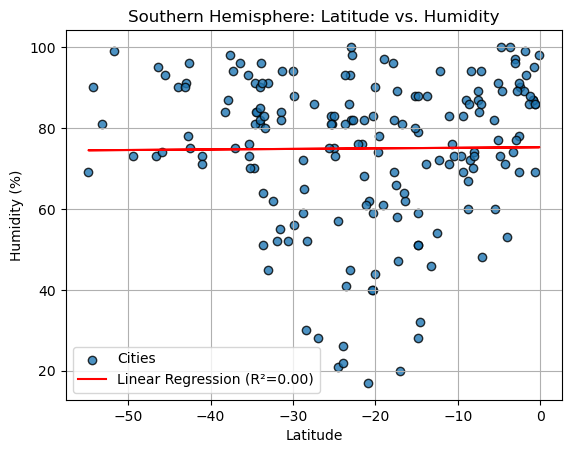

In [23]:
# Linear regression on Southern Hemisphere: Humidity vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Latitude", "Humidity (%)", 
                       "Southern Hemisphere: Latitude vs. Humidity", 
                       "output_data/SH_Lat_vs_Humidity.png")

**Discussion about the linear relationship:** No clear indicator for pattern of correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

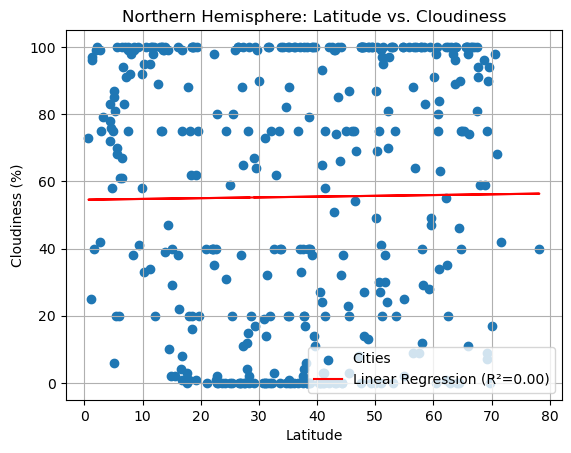

In [55]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Latitude", "Cloudiness (%)", 
                       "Northern Hemisphere: Latitude vs. Cloudiness", 
                       "output_data/NH_Lat_vs_Cloudiness.png")

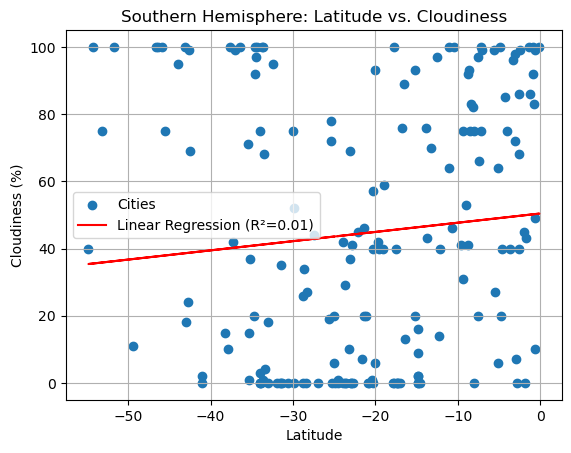

In [56]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Latitude", "Cloudiness (%)", 
                       "Southern Hemisphere: Latitude vs. Cloudiness", 
                       "output_data/SH_Lat_vs_Cloudiness.png")

**Discussion about the linear relationship:** Very little correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


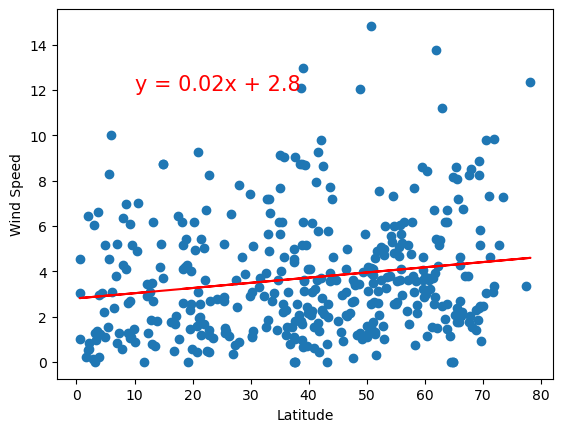

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


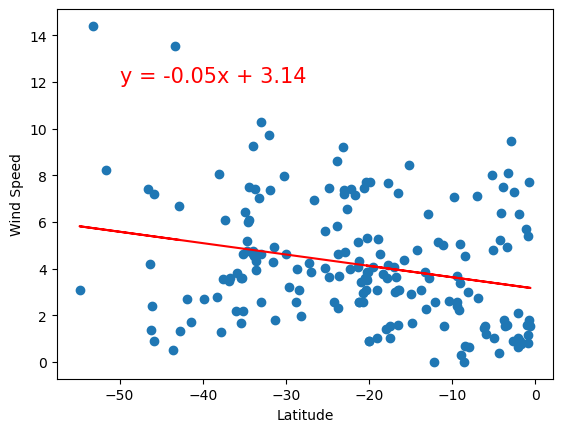

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE